<a href="https://colab.research.google.com/github/flp04/modelo_ia/blob/main/a3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importação das bibliotecas utilizads no projeto
import pandas as pd # utilizada pra manipulação de dados
import matplotlib.pyplot as plt # utilizada para criação de gráficos
import seaborn as sns # utilizada para visualização de dados baseada no matplotlib

# importação dos métodos utilizados no projeto
from sklearn.model_selection import train_test_split # utilizado para dividir o grupo de dados em dois conjuntos (treinamento e testes)
from sklearn.tree import DecisionTreeClassifier # utilizado como classificador da árvore de decisão para treinar e testar o modelo
from sklearn import metrics # utilizado para avaliar o modelo de aprendizado
from sklearn.preprocessing import LabelEncoder # utilizado para converter variáveis categóricas em numéricas
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

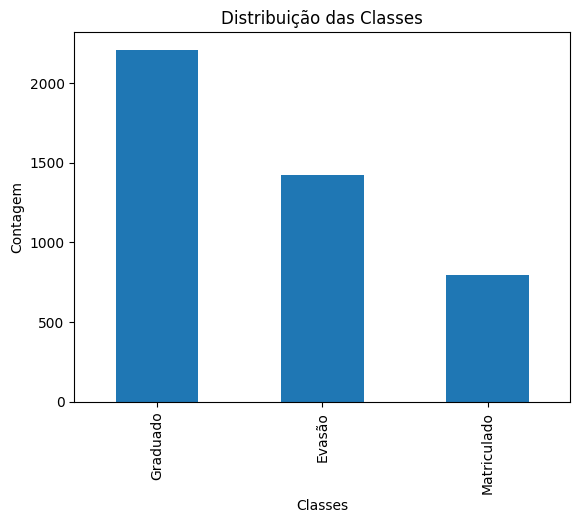

In [4]:
bd = 'data.xlsx' # caminho do arquivo com a base de dados
df = pd.read_excel(bd)
df['Class'].value_counts().plot(kind='bar', title='Distribuição das Classes', xlabel='Classes', ylabel='Contagem')

results = {
    "Model": ["SKlearn", "UnderSampled", "OverSampled", "ReSampled"],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

novos_nomes = ['Graduado', 'Evasão', 'Matriculado']  # Substitua pelos nomes desejados
plt.xticks(ticks=range(len(novos_nomes)), labels=novos_nomes)

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


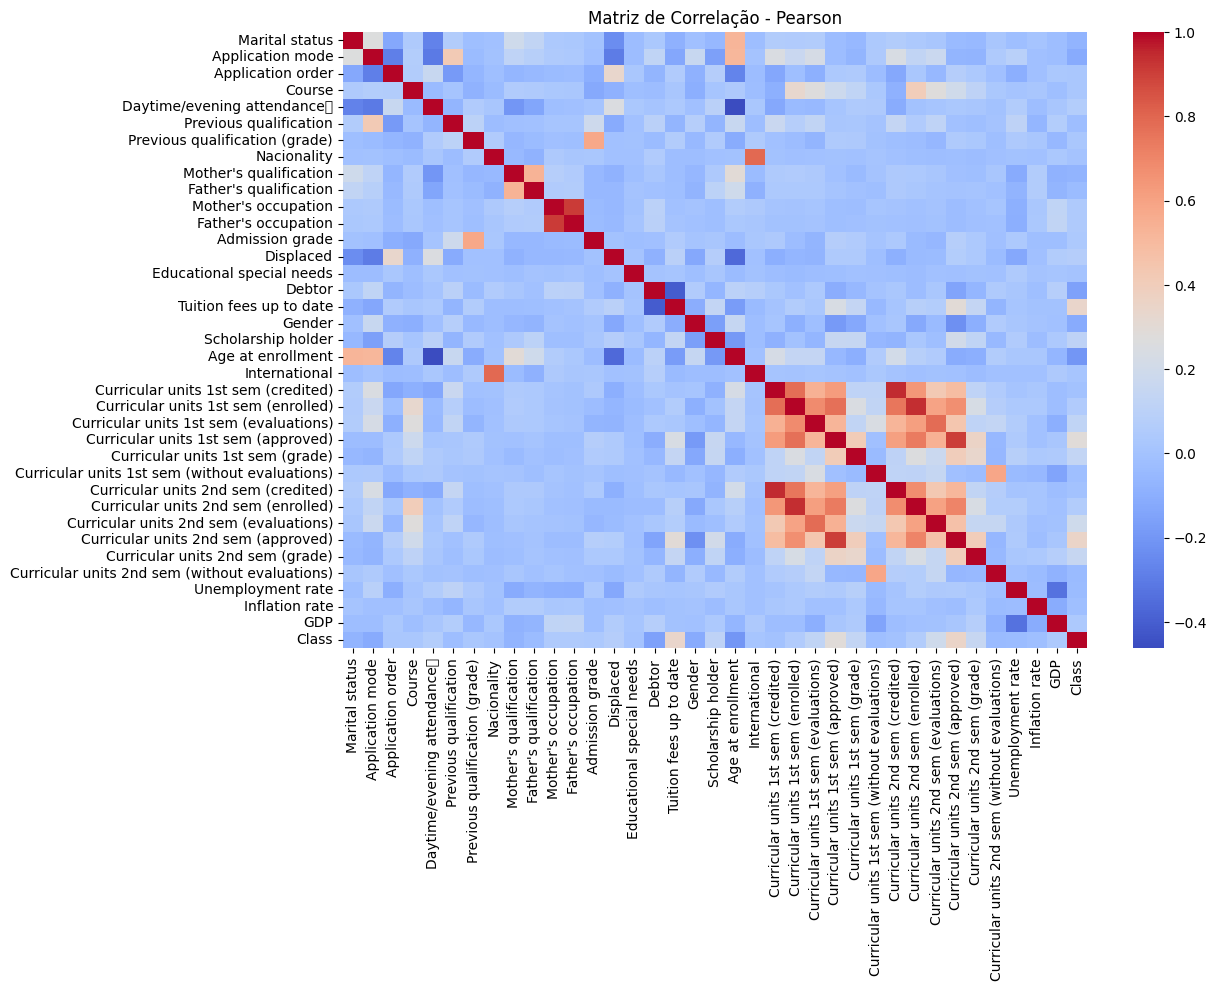

In [5]:
# Criando a matriz de correlação
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação - Pearson')
plt.show()

Acurácia do modelo: 69.50%
Acurácia do Logistic Regression: 62.27
Acurácia do k-NN: 63.48
Acurácia do Random Forest: 78.69


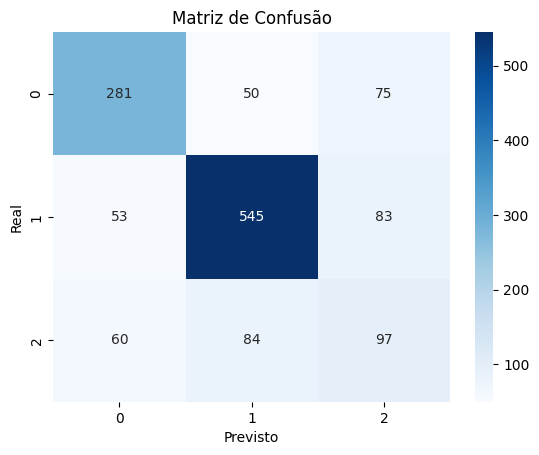

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Separação dos dados
features = df.drop('Class', axis=1)
target = df['Class']

# Divisão dos dados
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=1)

# Cria o modelo de decisão e o treina
classificador = DecisionTreeClassifier()
classificador = classificador.fit(x_train, y_train)

# Faz a prediçao no conjunto de testes
y_pred = classificador.predict(x_test)
# Verifica a acurracia do modelo
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy * 100:.2f}%')

models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "k-NN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
}

# Treinando e avaliando cada modelo
for name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Acurácia do {name}: {accuracy * 100:.2f}")

# Matriz de confusão
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

In [7]:
# Testando novos modelos
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "k-NN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
}

# Treinando e avaliando cada modelo
for name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Acurácia do {name}: {accuracy * 100:.2f}")

Acurácia do Logistic Regression: 62.27
Acurácia do k-NN: 63.48
Acurácia do Random Forest: 78.09


Precisão: 0.82
Recall: 0.82
F1-score: 0.82


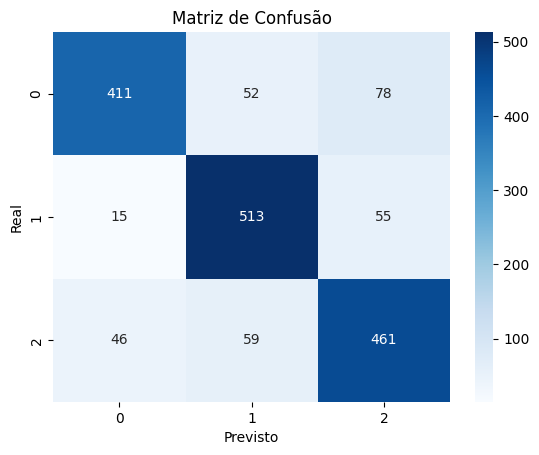

In [16]:
# Calculando outras métricas
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

predictions = model.predict(x_test)

# Calculando as métricas
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

results["Accuracy"].append(accuracy)
results["Precision"].append(precision)
results["Recall"].append(recall)
results["F1-Score"].append(f1)

# Exibindo os resultados
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Opcional: Matriz de confusão
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

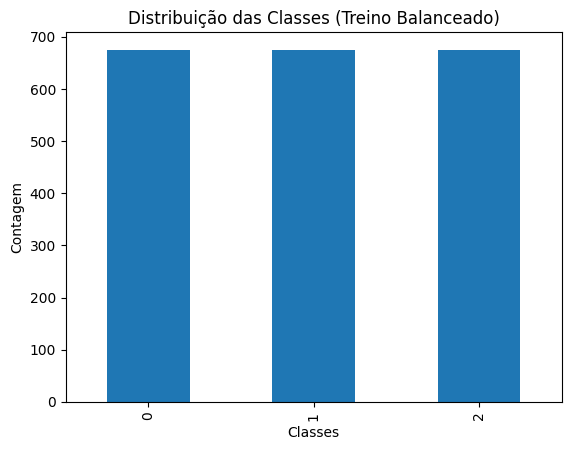

Acurácia do modelo: 56.25%
Acurácia do Logistic Regression: 0.46
Acurácia do k-NN: 0.49
Acurácia do Random Forest: 0.72
Precisão: 0.82
Recall: 0.82
F1-score: 0.82


In [18]:
bd = 'data.xlsx' # caminho do arquivo com a base de dados
df = pd.read_excel(bd)

# separar variáveis entre X e y
X = df.drop('Class', axis=1)
y = df['Class'] # variável alvo

# dividir o dataset entre treino e validação
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, test_size = 0.15)

# importar as bibliotecas necessárias
from imblearn.under_sampling import RandomUnderSampler

# criando uma instância do RandomUnderSampling
rus = RandomUnderSampler(random_state=42, sampling_strategy = 'auto')

# balanceando os dados
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Reunir as variáveis do conjunto de treino balanceado
balanced_train_df = pd.concat([X_resampled, y_resampled], axis=1)

# Verificar a distribuição das classes no conjunto de treino balanceado
balanced_train_df['Class'].value_counts().plot(kind='bar', title='Distribuição das Classes (Treino Balanceado)', xlabel='Classes', ylabel='Contagem')
plt.show()

# Separação dos dados
features = balanced_train_df.drop('Class', axis=1)
target = balanced_train_df['Class']

# Divisão dos dados
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=1)

# Cria o modelo de decisão e o treina
classificador = DecisionTreeClassifier()
classificador = classificador.fit(x_train, y_train)

# Faz a prediçao no conjunto de testes
y_pred = classificador.predict(x_test)
# Verifica a acurracia do modelo
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy * 100:.2f}%')

# Treinando e avaliando cada modelo
for name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Acurácia do {name}: {accuracy:.2f}")

results["Accuracy"].append(accuracy)
results["Precision"].append(precision)
results["Recall"].append(recall)
results["F1-Score"].append(f1)

# Exibindo os resultados
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

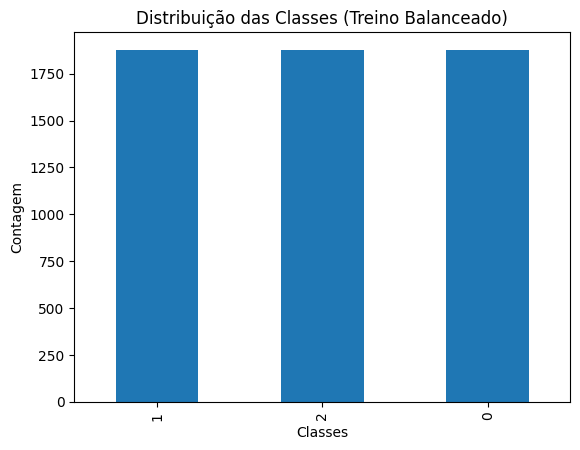

Acurácia do modelo: 56.09%
Acurácia do Logistic Regression: 0.46
Acurácia do k-NN: 0.49
Acurácia do Random Forest: 0.72
Precisão: 0.72
Recall: 0.72
F1-score: 0.72
Matriz de Confusão:


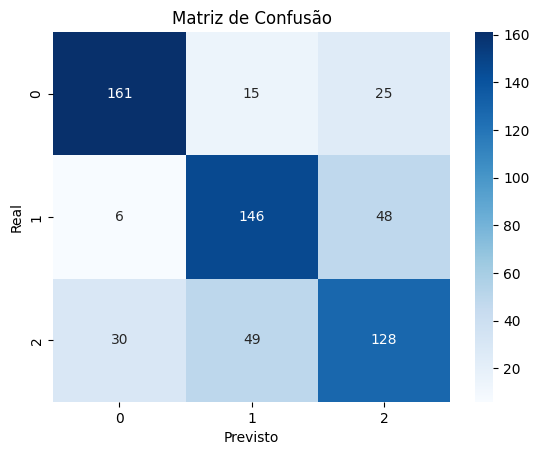

In [19]:
# importar as bibliotecas necessárias
from imblearn.over_sampling import SMOTE

# separar variáveis entre X e y
X = df.drop('Class', axis=1)
y = df['Class'] # variável alvo

# dividir o dataset entre treino e validação
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, test_size = 0.15)

# criando uma instância do SMOTE
smote = SMOTE()

# balanceando os dados
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Separação dos dados
features = balanced_train_df.drop('Class', axis=1)
target = balanced_train_df['Class']

# Reunir as variáveis do conjunto de treino balanceado
balanced_train_df = pd.concat([X_resampled, y_resampled], axis=1)

# Verificar a distribuição das classes no conjunto de treino balanceado
balanced_train_df['Class'].value_counts().plot(kind='bar', title='Distribuição das Classes (Treino Balanceado)', xlabel='Classes', ylabel='Contagem')
plt.show()

# Divisão dos dados
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=1)

# Cria o modelo de decisão e o treina
classificador = DecisionTreeClassifier()
classificador = classificador.fit(x_train, y_train)

# Faz a prediçao no conjunto de testes
y_pred = classificador.predict(x_test)
# Verifica a acurracia do modelo
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy * 100:.2f}%')

# Treinando e avaliando cada modelo
for name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Acurácia do {name}: {accuracy:.2f}")

# Calculando outras métricas
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

predictions = model.predict(x_test)

# Calculando as métricas
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

results["Accuracy"].append(accuracy)
results["Precision"].append(precision)
results["Recall"].append(recall)
results["F1-Score"].append(f1)

# Exibindo os resultados
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Opcional: Matriz de confusão
conf_matrix = confusion_matrix(y_test, predictions)
print("Matriz de Confusão:")
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

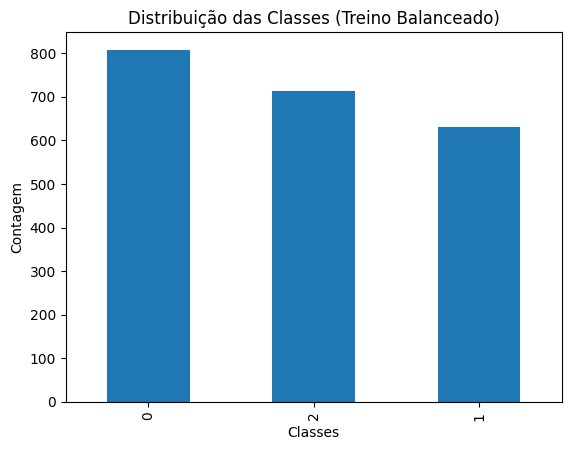

Acurácia do modelo: 70.47%
Acurácia do Logistic Regression: 0.45
Acurácia do k-NN: 0.63
Acurácia do Random Forest: 0.82
Precisão: 0.82
Recall: 0.82
F1-score: 0.82


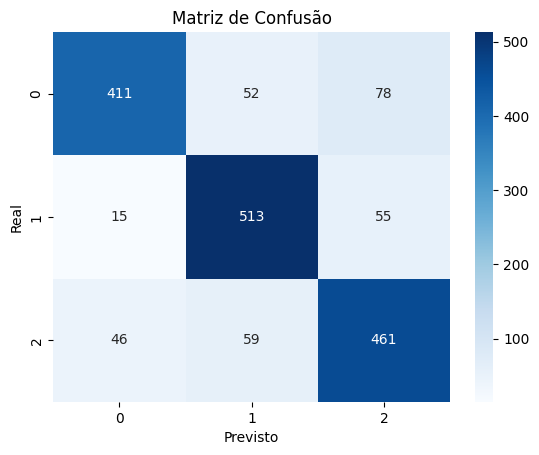

In [11]:
from imblearn.combine import SMOTEENN

bd = 'data.xlsx' # caminho do arquivo com a base de dados
df = pd.read_excel(bd)

# separar variáveis entre X e y
X = df.drop('Class', axis=1)
y = df['Class'] # variável alvo

# dividir o dataset entre treino e validação
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, test_size = 0.15)

# criando uma instância do SMOTE
smote_enn = SMOTEENN(random_state=42)

# balanceando os dados
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

# Separação dos dados
features = balanced_train_df.drop('Class', axis=1)
target = balanced_train_df['Class']

# Reunir as variáveis do conjunto de treino balanceado
balanced_train_df = pd.concat([X_resampled, y_resampled], axis=1)

# Verificar a distribuição das classes no conjunto de treino balanceado
balanced_train_df['Class'].value_counts().plot(kind='bar', title='Distribuição das Classes (Treino Balanceado)', xlabel='Classes', ylabel='Contagem')
plt.show()

# Divisão dos dados
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=1)

# Cria o modelo de decisão e o treina
classificador = DecisionTreeClassifier()
classificador = classificador.fit(x_train, y_train)

# Faz a prediçao no conjunto de testes
y_pred = classificador.predict(x_test)
# Verifica a acurracia do modelo
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy * 100:.2f}%')

# Treinando e avaliando cada modelo
for name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Acurácia do {name}: {accuracy:.2f}")

# Calculando outras métricas
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

predictions = model.predict(x_test)

# Calculando as métricas
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

results["Accuracy"].append(accuracy)
results["Precision"].append(precision)
results["Recall"].append(recall)
results["F1-Score"].append(f1)

# Exibindo os resultados
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Opcional: Matriz de confusão
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

In [21]:

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Definir os modelos individuais
modelo1 = LogisticRegression(max_iter=10000)
modelo2 = KNeighborsClassifier()
modelo3 = RandomForestClassifier()
modelo4 = DecisionTreeClassifier()

# Criar o comitê de classificação
comite = VotingClassifier(
    estimators=[
        ('Logistic Regression', modelo1),
        ('k-NN', modelo2),
        ('Random Forest', modelo3),
        ('Decision Tree', modelo4),
    ],
    voting='hard'  # 'hard' para votação majoritária, 'soft' para média das probabilidades
)

# Treinar o comitê no conjunto de treino
comite.fit(x_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_comite = comite.predict(x_test)

# Avaliar o desempenho
acuracia_comite = accuracy_score(y_test, y_pred_comite)
print(f"Acurácia do Comitê de Classificação: {acuracia_comite * 100:.2f}%")

Acurácia do Comitê de Classificação: 64.47%
